In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [39]:
ticker = "AAPL"  # Example stock ticker
data = yf.download(ticker, period="1y", interval="1d")  # 1-year daily data

[*********************100%***********************]  1 of 1 completed


/Users/saideexith/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:718: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [40]:
data['Daily Return'] = data['Close'].pct_change()

In [41]:
data = data.dropna()


In [42]:
mean_close = data['Close'].mean()
std_close = data['Close'].std()

mean_volume = data['Volume'].mean()
std_volume = data['Volume'].std()

mean_return = data['Daily Return'].mean()
std_return = data['Daily Return'].std()

In [43]:
data['Z-score Close'] = (data['Close'] - mean_close) / std_close
data['T-score Close'] = (data['Close'] - mean_close) / (std_close / np.sqrt(len(data)))


/var/folders/kc/5_lzz249369493dsbl1ldzn40000gn/T/ipykernel_14798/435636086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Z-score Close'] = (data['Close'] - mean_close) / std_close
/var/folders/kc/5_lzz249369493dsbl1ldzn40000gn/T/ipykernel_14798/435636086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['T-score Close'] = (data['Close'] - mean_close) / (std_close / np.sqrt(len(data)))


In [44]:
from scipy.stats import norm

In [45]:
confidence_level = 0.95
z_alpha = norm.ppf(1 - (1 - confidence_level) / 2)
ci_close_lower = mean_close - z_alpha * (std_close / np.sqrt(len(data)))
ci_close_upper = mean_close + z_alpha * (std_close / np.sqrt(len(data)))

In [46]:
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

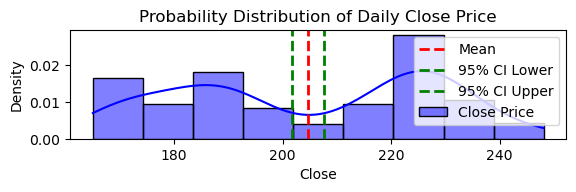

In [47]:
plt.subplot(3, 1, 1)
sns.histplot(data['Close'], kde=True, stat="density", label="Close Price", color="blue")
plt.axvline(mean_close, color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(ci_close_lower, color='green', linestyle='dashed', linewidth=2, label="95% CI Lower")
plt.axvline(ci_close_upper, color='green', linestyle='dashed', linewidth=2, label="95% CI Upper")
plt.title("Probability Distribution of Daily Close Price")
plt.legend()

In [48]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


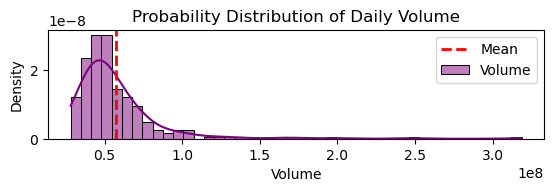

In [49]:
plt.subplot(3, 1, 2)
sns.histplot(data['Volume'], kde=True, stat="density", label="Volume", color="purple")
plt.axvline(mean_volume, color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.title("Probability Distribution of Daily Volume")
plt.legend()

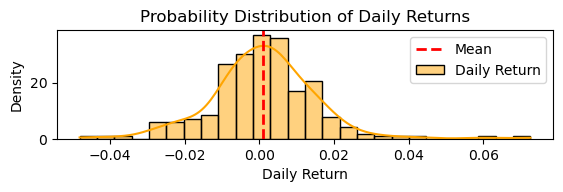

In [50]:
plt.subplot(3, 1, 3)
sns.histplot(data['Daily Return'], kde=True, stat="density", label="Daily Return", color="orange")
plt.axvline(mean_return, color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.title("Probability Distribution of Daily Returns")
plt.legend()

In [51]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [52]:
print(f"Daily Close Price Mean: {mean_close:.2f}, Std Dev: {std_close:.2f}")
print(f"95% Confidence Interval for Close Price: ({ci_close_lower:.2f}, {ci_close_upper:.2f})")


Daily Close Price Mean: 204.68, Std Dev: 23.64
95% Confidence Interval for Close Price: (201.75, 207.60)
